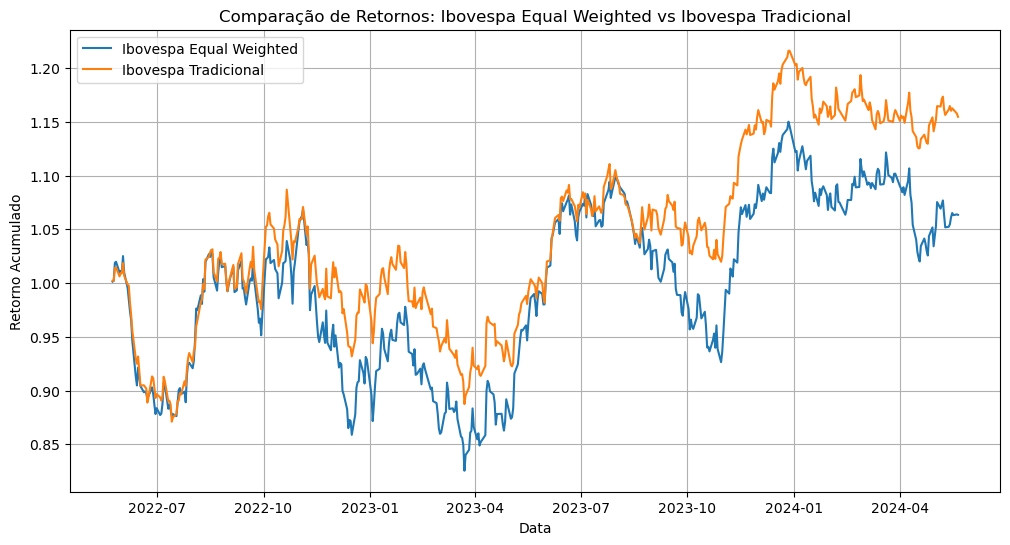

In [45]:
import cloudscraper
from bs4 import BeautifulSoup
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import logging

%matplotlib inline

# Desativar mensagens de log de yfinance
logging.getLogger('yfinance').setLevel(logging.WARNING)

# Função para obter a lista de ativos do Ibovespa do site Status Invest
def obter_ativos_ibovespa():
    url = "https://statusinvest.com.br/indices/ibovespa"
    scraper = cloudscraper.create_scraper()
    response = scraper.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    tickers = []
    spans = soup.find_all('span', {'class': 'ticker'})
    for span in spans:
        ticker = span.text.strip() + '.SA'
        tickers.append(ticker)
    
    return tickers
# Selecionar um período
periodo = "2y"

# Obter lista de ativos do Ibovespa
ativos_ibovespa = obter_ativos_ibovespa()

# Baixar dados dos ativos do Ibovespa
dados_ativos = yf.download(ativos_ibovespa, period=periodo, progress=False)['Adj Close']

# Calcular retornos diários
retornos_diarios = dados_ativos.pct_change()

def preencher_nan_com_media_linha(row):
    media_linha = row.mean()
    return row.fillna(media_linha)

retornos_diarios = retornos_diarios.apply(preencher_nan_com_media_linha, axis=1)

# Calcular o retorno diário do índice equal weighted
retorno_equal_weighted = retornos_diarios.mean(axis=1)

# Obter dados do índice Ibovespa tradicional
dados_ibovespa = yf.download('^BVSP', period=periodo, progress=False)['Adj Close']

# Calcular retornos diários do Ibovespa tradicional
retorno_ibovespa = dados_ibovespa.pct_change().dropna()

# Normalizar os retornos acumulados para plotar no mesmo gráfico
retorno_equal_weighted_acumulado = (1 + retorno_equal_weighted).cumprod()
retorno_ibovespa_acumulado = (1 + retorno_ibovespa).cumprod()

# Plotar os retornos acumulados
plt.figure(figsize=(12, 6))
plt.plot(retorno_equal_weighted_acumulado, label='Ibovespa Equal Weighted')
plt.plot(retorno_ibovespa_acumulado, label='Ibovespa Tradicional')
plt.title('Comparação de Retornos: Ibovespa Equal Weighted vs Ibovespa Tradicional')
plt.xlabel('Data')
plt.ylabel('Retorno Acumulado')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
retorno_equal_weighted

Date
2022-05-23         NaN
2022-05-24    0.001357
2022-05-25    0.000716
2022-05-26    0.016686
2022-05-27    0.001007
                ...   
2024-05-15    0.006119
2024-05-16    0.003810
2024-05-17   -0.001825
2024-05-20    0.000613
2024-05-21   -0.000360
Length: 499, dtype: float64

In [46]:
retornos_diarios

Ticker,ABEV3.SA,ALOS3.SA,ALPA4.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TRPL4.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VAMO3.SA,VBBR3.SA,VIVA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-24,0.003551,NaN,0.003372,0.003647,0.001890,-0.057832,-0.006612,-0.011747,0.019453,0.021011,...,0.011825,0.022027,-0.000873,0.013507,-0.023098,-0.022189,-0.005334,0.006592,-0.018442,-0.016147
2022-05-25,-0.006369,NaN,0.022084,-0.004261,-0.011321,-0.029966,-0.009151,-0.006085,-0.009541,-0.011269,...,-0.021036,0.016212,0.015734,0.003094,0.008345,0.005547,0.017739,0.008282,-0.029525,0.000000
2022-05-26,0.012108,NaN,0.041334,0.022779,0.023537,0.043847,0.041981,-0.002928,0.004215,0.005451,...,-0.025468,0.042785,-0.016351,-0.000593,0.026897,0.013039,0.000811,-0.007068,0.015804,0.022071
2022-05-27,0.000000,NaN,0.025259,0.014273,-0.018024,0.000477,0.023368,-0.010945,0.007194,0.014292,...,-0.008166,-0.007650,-0.013998,0.017448,0.028878,0.008911,0.023896,-0.008465,0.019837,-0.044851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-15,0.012336,0.035564,0.016016,0.026479,0.019757,-0.022543,0.003487,-0.012853,-0.005004,-0.009687,...,0.030514,0.014943,0.003797,-0.002940,0.018916,-0.008750,0.016321,0.011918,0.000252,-0.008639
2024-05-16,0.005686,-0.003615,-0.004926,0.012690,0.003726,-0.054428,0.006082,0.001085,0.000000,0.005267,...,-0.029985,0.002786,0.005044,0.007294,0.042079,0.004624,0.014323,0.014177,-0.000505,-0.048657
2024-05-17,0.000000,-0.007256,-0.016832,0.008422,0.011878,-0.017561,-0.013817,0.000361,0.007544,0.005240,...,0.011978,-0.014286,-0.001255,0.019565,0.011877,-0.008787,-0.013265,-0.001075,0.001010,-0.015267
